In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("haberman.csv", names=["age", "operation_year", "axillary_lymph_node", "survival_status"])
df

,age,operation_year,axillary_lymph_node,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


# Survival Status
1 - the patient survived 5 years or longer
2 - The patient died within 5 years

In [3]:
df.shape

(306, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  306 non-null    int64
 1   operation_year       306 non-null    int64
 2   axillary_lymph_node  306 non-null    int64
 3   survival_status      306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
df.describe()

,age,operation_year,axillary_lymph_node,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [6]:
df["survival_status"] = df["survival_status"].map({1:"Yes", 2:"No"})
df.head()

,age,operation_year,axillary_lymph_node,survival_status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [7]:
df["survival_status"].value_counts()

Yes    225
No      81
Name: survival_status, dtype: int64

In [31]:
status_yes = df[df["survival_status"] == "Yes"]
status_yes.describe()

,age,operation_year,axillary_lymph_node
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [32]:
status_no = df[df["survival_status"] == "No"]
status_yes.describe()

,age,operation_year,axillary_lymph_node
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


/home/bs815/Desktop/study/probability_statistics_and_machine_learning/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/bs815/Desktop/study/probability_statistics_and_machine_learning/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://

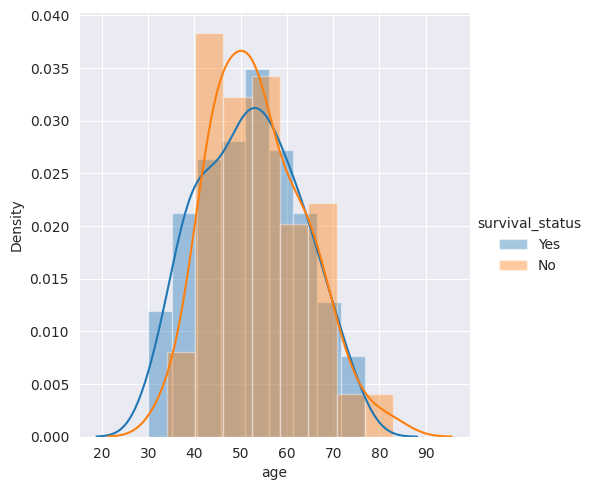

In [9]:
# univariant analysis
sns.FacetGrid(df, hue="survival_status", height=5)\
    .map(sns.distplot, "age")\
    .add_legend();
plt.show()

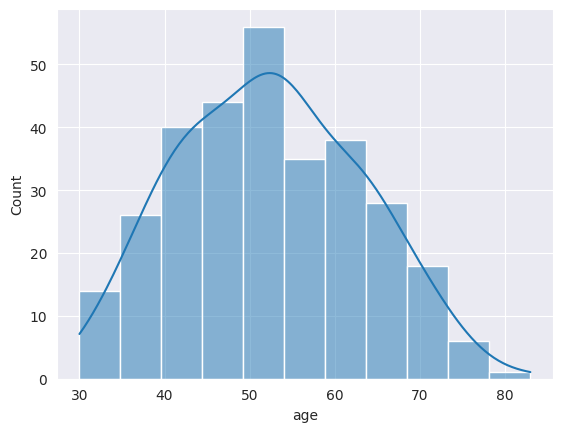

In [12]:
sns.histplot(data=df["age"], kde=True)
plt.show()

In [14]:
df.axillary_lymph_node

0      1
1      3
2      0
3      2
4      4
      ..
301    1
302    0
303    3
304    1
305    2
Name: axillary_lymph_node, Length: 306, dtype: int64

/home/bs815/Desktop/study/probability_statistics_and_machine_learning/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/bs815/Desktop/study/probability_statistics_and_machine_learning/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://

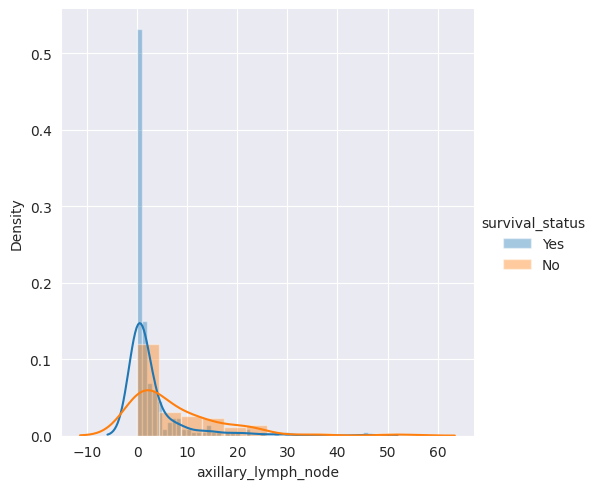

In [15]:
# univariant analysis
sns.FacetGrid(df, hue="survival_status", height=5) \
    .map(sns.distplot, "axillary_lymph_node") \
    .add_legend();
plt.show()

# CDF

In [16]:
status_yes

,age,operation_year,axillary_lymph_node,survival_status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes
...,...,...,...,...
298,73,68,0,Yes
300,74,63,0,Yes
301,75,62,1,Yes
302,76,67,0,Yes


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


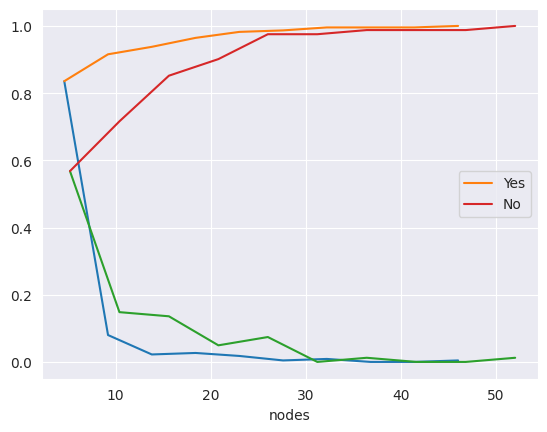

In [33]:
counts1, bin_edges1 = np.histogram(status_yes["axillary_lymph_node"], bins=10, density=True)
pdf1 = counts1/sum(counts1)
print(pdf1)
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
print(cdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label="Yes")

print("************************************")

counts2, bin_edges2 = np.histogram(status_no["axillary_lymph_node"], bins=10, density=True)
pdf2 = counts2/sum(counts2)
print(pdf2)
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
print(cdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label="No")
plt.xlabel("nodes")
plt.legend()
plt.show()
# bin_edges1